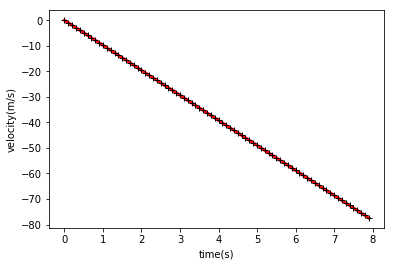

In [23]:
#//Challenge 2.3//

# k is determined by the terminal velocity which happenes when the net force is 0 then you move with const velocity 
#Terminal velocity is the highest velocity attainable by an object as it falls through a fluid (air is the most common example). 
#It occurs when the sum of the drag force (Fd) and the buoyancy is equal to the downward force of gravity (FG) acting on the object. 
#Since the net force on the object is zero.

#cause y is changing, decreasing as it goes downward therefore the force is increasing, 

#PART 1: #// Modify your code to simulate the fall of a particle from an altitude  y0  with zero initial velocity:

import numpy as np
from matplotlib import pyplot

class particle(object): #new thing: class defintions 
    
    def __init__(self, mass=1., y=0., v=0.): #we treated the object's position and velocity as first order ODE
        self.mass = mass #init what can you input in particle. every time you define a class then you have to put the first argument as self
        self.y = y
        self.v = v
        
    def euler(self, f, dt):
        self.y = self.y + self.v*dt #the Euler's method applied
        self.v = self.v + f/self.mass*dt
        
    def euler_cromer(self, f, dt):
        self.v = self.v + f/self.mass*dt
        self.y = self.y + self.v*dt



R = 6.37e6
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
#k2 = g*mass/vt**2  # drag coeff.

dt = 0.1           # time step

gforce = g*mass    # weight

p = particle(mass, y0, v0)

y = [y0] # since we do not know the size of the arrays, we define first a python list
v = [v0] # the append method is more efficient for lists than arrays
t = [0.]
#yarray = np.array (y)

while p.y > 0.:
    fy = (-gforce)/(1+(p.y/R)**2) #when you're falling your losing position 
    #Drag force #k2*p.v*abs(p.v) #abs() returns the absolute value of a number
    p.euler(fy, dt)
    y.append(p.y)
    v.append(p.v)
    t.append(t[-1]+dt)
    #print (p.v)   
    
t_data = np.array(t) # we convert the list into a numpy array for plotting
y_data = np.array(y)
v_data = np.array(v)

#//comparing data
p1 = particle(mass, y0,v0)

y1 = [y0]
v1 = [v0]
t1 = [0.]

while p1.y >0.:
    fy1 = -gforce
    p1.euler(fy1,dt)
    y1.append(p1.y)
    v1.append(p1.v)
    t1.append(t1[-1]+dt)
    
t1_data = np.array(t1)
y1_data = np.array(y1)
v1_data = np.array(v1)

pyplot.plot(t_data, v_data, color="#FF0000", ls='-', lw=3)
pyplot.xlabel('time(s)');
pyplot.ylabel('velocity(m/s)'); 

pyplot.plot(t1_data, v1_data, "k+")
pyplot.xlabel('time(s)');
pyplot.ylabel('velocity(m/s)');


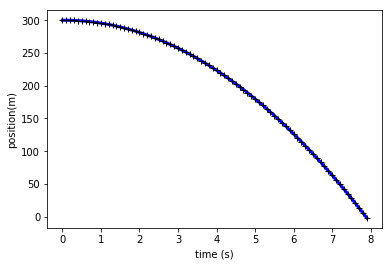

In [3]:
pyplot.plot(t_data, y_data, color="#0000FF", ls='-', lw=3)
pyplot.xlabel('time (s)');
pyplot.ylabel('position(m)');

pyplot.plot(t1_data, y1_data, "k+")
pyplot.xlabel('time (s)');
pyplot.ylabel('position(m)');

In [40]:
#PART 2: 
#changing the y0 and make it a range instead that's close to the radius of Earth in order to show the 10% difference
#compare velcoities when it hits ground for different ranges and print the difference, when did it show 10%?



R = 6.37e6
g = 9.8            # g acceleration
mass = 0.01        # mass of the particle
#y0 = 300.          # initial position
v0 = 0.            # initial velocity
vt = 30.           # terminal velocity
#k2 = g*mass/vt**2  # drag coeff.

dt = 500           # time step

gforce = g*mass    # weight


 # since we do not know the size of the arrays, we define first a python list
 # the append method is more efficient for lists than arrays

#yarray = np.array (y)

y0_range = np.linspace(0,199999,1000)

for i in range(0,len(y0_range)):
    #y0_range = y[i]
    p = particle(mass, y0_range[i], v0)
    y = [y0_range[i]]
    v = [v0]
    t = [0.]
    while p.y > 0.:
        fy = (-gforce)/(1+(p.y/R)**2) #when you're falling your losing position #Drag force #k2*p.v*abs(p.v) #abs() returns the absolute value of a number
        p.euler(fy, dt)
        y.append(p.y)
        v.append(p.v)
        t.append(t[-1]+dt)
        #print (p.v)   
        t_data = np.array(t) # we convert the list into a numpy array for plotting
        y_data = np.array(y)
        v_data = np.array(v)
    
    p1 = particle(mass, y0_range[i],v0)
    y1 = [y0_range[i]]
    v1 = [v0]
    t1 = [0.]
    while p1.y > 0.:
        fy1 = -gforce
        p1.euler(fy1,dt)
        y1.append(p1.y)
        v1.append(p1.v)
        t1.append(t1[-1]+dt)

        t1_data = np.array(t1)
        y1_data = np.array(y1)
        v1_data = np.array(v1)
#perecent = (abs(current - previous) / previous) * 100
    if v[-1] != 0:
        percent = ((v1[-1]-v[-1])/v[-1])*100
        print (percent)
            #def get_change(v1[-1], v[-1]):
            #if v1[-1] == v[-1]:
                #return 100.0
            #try:  #The try block lets you test a block of code for errors
                #return (abs(current - previous) / previous) * 100.0
            #except ZeroDivisionError: #The except block lets you handle the error.
                #return 0
    if percent > 1: 
        print ('Intial Position'+ 'Final Speed Differ')


9.877470700556244e-08
3.950989034374889e-07
8.889724628802843e-07
1.5803955211156313e-06
2.469367993533361e-06
3.5558899277926662e-06
4.839961281088703e-06
6.321582068641522e-06
8.000752326573841e-06
9.87747200054433e-06
1.1951741112797675e-05
1.4223559669358991e-05
1.6692927678594938e-05
1.935984513265259e-05
2.222431198889832e-05
2.528632831840679e-05
2.8545894064666314e-05
3.200300928487353e-05
3.5657673908638685e-05
3.950988799784148e-05
4.355965152389753e-05
4.7806964479125074e-05
5.225182687674504e-05
5.6894238713758736e-05
6.173419998950902e-05
6.677171070568028e-05
7.200677086629841e-05
7.743938047773087e-05
8.306953951156432e-05
8.889724801597154e-05
9.49225059115388e-05
0.00010114531326968307
0.00010756567007135713
0.00011418357631841634
0.00012099903199649651
0.00012801203713069725
0.00013522259167421502
0.00014263069567539357
0.00015023634912923476
0.00015803955199595953
0.0001660403043309362
0.0001742386060805075
0.0001826344573047249
0.00019122785791749166
0.0002000188080